In [3]:
import os
#Loading the best previous model
from keras.models import load_model
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
model_path = os.path.join(save_dir, model_name)
model = load_model(model_path)

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras.models import load_model
from keras.utils import multi_gpu_model
import argparse
from matplotlib import pyplot as plt
from IPython.display import clear_output


class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

train
 (50000, 32, 32, 3) (50000, 1)
(25000, 32, 32, 3) (25000, 1)
test
 (10000, 32, 32, 3) (10000, 1)
(5000, 32, 32, 3) (5000, 1)


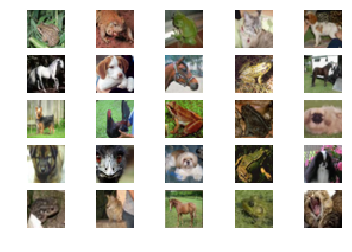

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline



shrink_data = True

# Returns two tuples
# x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32).
# y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples,).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

if shrink_data:
    selected_classes = [2, 3, 5, 6, 7] # 2 - Bird, 3 - Cat, 5 - Dog, 6 - Frog and 7 - Horse.
    print('train\n', x_train.shape, y_train.shape) #Print the current shape of an train data
    
    #Select the needed classes only ( as given in 'selected_classes' variable above)
    x = [ex for ex, ey in zip(x_train, y_train) if ey in selected_classes]
    y = [selected_classes.index(ey) for ex, ey in zip(x_train, y_train) if ey in selected_classes]
    
    x_train = np.stack(x) # Join a sequence of arrays along a new axis.
    y_train = np.stack(y).reshape(-1,1)  # Join a sequence of arrays along a new axis and reshaping them without changing its data.
#    Eventually we get this format below from the (-1,1) reshape, means -1 for unknown rows and 1 for 1 column.
#    ([[ 1],
#    [ 2],
#    [ 3],...
    
    #Print the current shape of an train data
    print(x_train.shape, y_train.shape)

    #Print the current shape of an test data
    print('test\n', x_test.shape, y_test.shape)
    
    #Select the needed classes only ( as given in 'selected_classes' variable above)
    x = [ex for ex, ey in zip(x_test, y_test) if ey in selected_classes]
    y = [selected_classes.index(ey) for ex, ey in zip(x_test, y_test) if ey in selected_classes]
    
    x_test = np.stack(x)  # Join a sequence of arrays along a new axis.
    y_test = np.stack(y).reshape(-1,1) # Join a sequence of arrays along a new axis and reshaping them without changing its data. Example above.

    print(x_test.shape, y_test.shape)
    num_classes = len(selected_classes) 
else:
    print('train\n', x_train.shape, y_train.shape)
    print('test\n', x_test.shape, y_test.shape)
    num_classes = 10

 

# show some images
plt.figure(1)
for i in range (1,26):
    ax = plt.subplot(5,5,i)
    ax.axis('off')
    ax.imshow(x[i].reshape(32,32,3))

plt.show()

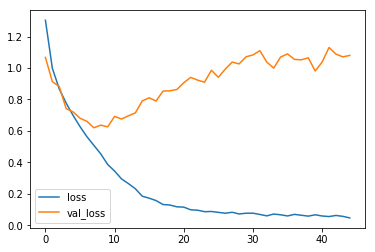

5000/5000 [==============================] - 15s 3ms/step
==> Test loss: 1.11003130531
==> Test accuracy: 0.7756
Amount of ephocs performed :  45


OSError: Unable to create file (Unable to open file: name = ''c:\users\segev\desktop\new_model', errno = 22, error message = 'invalid argument', flags = 13, o_flags = 302)

In [107]:
from keras.callbacks import ModelCheckpoint
batch_size = 128 # Defines number of samples that going to be propagated through the network.
epochs = 45 # Amount of times we run through the data.

# The data, shuffled and split between train and test sets:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential() # The Sequential model is a linear stack of layers.

#Block 1
model.add(Conv2D(32, (3, 3), padding='same',
               input_shape=x_train.shape[1:]))
model.add(Activation('relu')) # Applies an activation function to an output.

#Block 2
model.add(Conv2D(64, (3, 3))) # Adding a convolutional 2D layer with input shape as 32,(3,3)
model.add(Activation('relu')) #Applies an activation function to an output.
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling operation for spatial data.
model.add(Dropout(0.2)) # Applies the dropout

#Block 3
model.add(Conv2D(64, (3, 3), padding='same'))  # Adding a convolutional 2D layer with input shape
model.add(Activation('relu')) # Applies an activation function to an output.

#Block 4
model.add(Conv2D(64, (3, 3))) # Adding a convolutional 2D layer with input shap
model.add(Activation('relu')) # Applies an activation function to an output.
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling operation for spatial data.
model.add(Dropout(0.2)) # Applies the dropout

model.add(Flatten()) #Return a copy of the array collapsed into one dimension.
model.add(Dense(512))
model.add(Activation('relu')) # Applies an activation function to an output.
model.add(Dropout(0.2)) # Applies the dropout
model.add(Dense(num_classes))

#Block 5
model.add(Activation('softmax')) # Applies an activation function to an output.

# initiate ADAM optimizer
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#Checkpoint the best model
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(x_train, y_train,  # this is our training examples & labels
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1,  # this parameter control the % of train data used for validation
          shuffle=True,
          callbacks=[plot_losses])  # this prints our loss at the end of every epoch

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('==> Test loss:', scores[0])
print('==> Test accuracy:', scores[1])
print("Amount of ephocs performed : ", epochs)

model.save("'C:\\Users\\segev\\Desktop\\new_model")

In [20]:
model.save("my_model.h5")

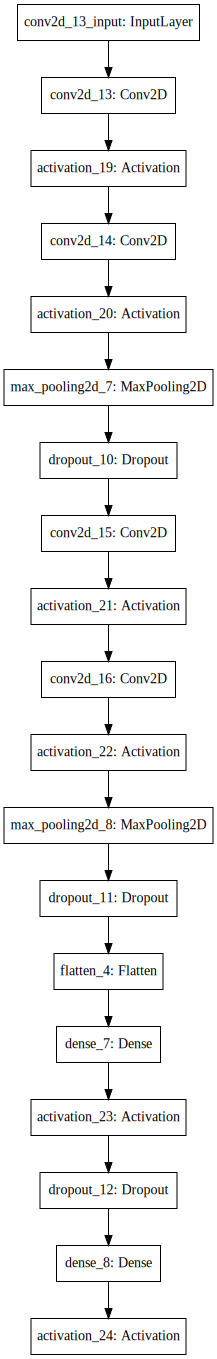

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

(32, 32, 3)


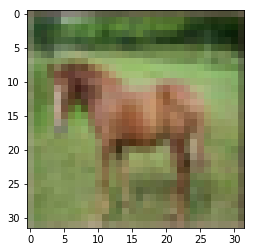

In [8]:
img = x_test[23]
label = np.argmax(y_test[23])
print(img.shape)
plt.imshow(img)

In [11]:
prediction = model.predict(img[np.newaxis,...])
prediction = np.argmax(prediction)
print('model prediction: {}'.format(prediction))
print('ground truth: {}'.format(label))
if prediction == label: print('great! we got it right')

model prediction: 4
ground truth: 0


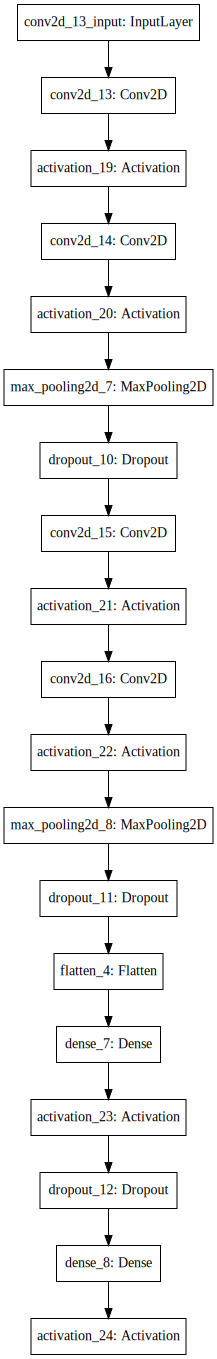

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [80]:
model.add(Dropout(0.5)) # Applies the dropout
model.add(Dense(num_classes+1))
model.add(Activation('softmax')) # Applies an activation function to an output.

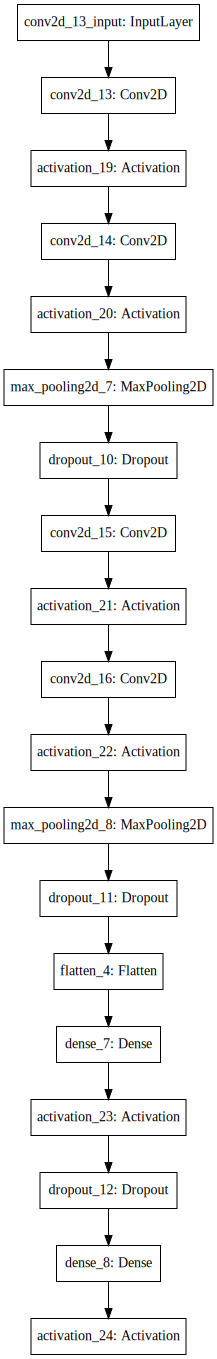

In [36]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [38]:
#Saving a copy of the model summary
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [31]:
from PIL import Image
import numpy as np
# Loading an unknown amount of pictures of a folder and predicting them
folder_name = 'C:\\Users\\segev\\Desktop\\testSet'
classes = ["Bird","Cat","Dog","Frog","Horse"]

for filename in os.listdir(folder_name):
    print(filename)
    img = Image.open(folder_name + '\\' + filename)
    img.load()
    img = img.resize((32, 32), Image.ANTIALIAS)
    data = np.asarray( img, dtype="int32" )
    data = np.expand_dims(data,axis = 0)
    y_prob = model.predict(data) 
    y_classes = y_prob.argmax(axis=-1)
    print(classes[y_classes[0]]) # 2 - Bird, 3 - Cat, 5 - Dog, 6 - Frog and 7 - Horse.

bird.jpg
Bird
dog.jpg
Horse
frog-1.jpg
Frog
horse.jpg
Bird
horse2.jpg
Horse
small-kitten-meowing.jpg
Cat


In [ ]:
####################################### TRANSFER LEARNING #######################################

In [ ]:
#Saving the resized data
from PIL import Image
new_data_path = "C:\\Users\\segev\Desktop\\FlowersDS\\JPEG96"

for filename in (os.listdir(new_data_path)):
    img = Image.open(new_data_path + "\\" + filename)
    img = img.resize((32,32), Image.ANTIALIAS)
    img.save("C:\\Users\\segev\\Desktop\\DataResized\\" + "\\" +filename)

In [72]:
new_y_train = []
for label in y_train:
    label = np.pad(label, (0,1), 'constant', constant_values=(0, 0))
    new_y_train.append(label)

    
new_y_train = np.vstack(new_y_train)

In [74]:
new_y_test = []
for label in y_test:
    label = np.pad(label, (0,1), 'constant', constant_values=(0, 0))
    new_y_test.append(label)

    
new_y_test = np.vstack(new_y_test)

In [76]:
new_x_train = x_train

In [77]:
resized_data_train_path = "C:\\Users\\segev\\Desktop\\DataResized\\trainSet"
resized_data_test_path = "C:\\Users\\segev\\Desktop\\DataResized\\testSet"
temp = []
ytemp = []
# Loading the new_x_train
for fileName in os.listdir(resized_data_train_path):
    img = Image.open(resized_data_train_path + '\\' + fileName)
    img = np.asarray(img, dtype="float32" )
    img = img/255
    temp.append(img)
    ytemp.append([0,0,0,0,0,1])
    
#Now new_x_train has x_train + the new data

In [79]:
ytemp = np.vstack(ytemp)

In [80]:
new_x_train = np.vstack((new_x_train,temp))

In [82]:
new_y_train = np.vstack((new_y_train,ytemp))

In [47]:
print(new_y_train)

[[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 ..., 
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.]]


In [84]:
new_x_test = x_test

In [85]:
# Loading the new_x_test
temp2 = []
ytemp2 = []
for fileName in os.listdir(resized_data_test_path):
    img = Image.open(resized_data_test_path + '\\' + fileName)
    img = np.asarray(img, dtype="float32" )
    img = img/255
    temp2.append(img)
    ytemp2.append([0,0,0,0,0,1])

In [87]:
ytemp2 = np.vstack(ytemp2)

In [88]:
new_y_test = np.vstack((new_y_test,ytemp2))

In [89]:
new_x_test = np.vstack((new_x_test,temp2))

In [91]:
new_model = model
#Freezing all the layers besides the last one
for layer in new_model.layers:
    layer.trainable = False
    
#Removing the last layer
new_model.layers.pop()

In [63]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_44 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [93]:
new_model.add(Dense(num_classes + 1))
new_model.add(Activation('softmax')) # Applies an activation function to an output.

In [94]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_44 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [99]:
new_x_train.shape

(31994, 32, 32, 3)

In [103]:
from keras.callbacks import ModelCheckpoint
new_batch_size = 128 # Defines number of samples that going to be propagated through the network.
new_epochs = 15 # Amount of times we run through the data.

#new_y_train = keras.utils.to_categorical(new_y_train, 6)
#new_y_test = keras.utils.to_categorical(new_y_test, 6)

# initiate ADAM optimizer
new_opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Let's train the model using RMSprop
new_model.compile(loss='categorical_crossentropy',
              optimizer=new_opt,
              metrics=['accuracy'])

#Checkpoint the best model
save_dir = os.path.join(os.getcwd(), 'saved_models')
new_model_name = 'new_keras_cifar10_trained_model.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
new_model_path = os.path.join(save_dir, new_model_name)
new_checkpoint = ModelCheckpoint(new_model_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [new_checkpoint]

new_model.fit(new_x_train, new_y_train,  # this is our training examples & labels
          batch_size=new_batch_size,
          epochs=new_epochs,
          validation_split=0.1,  # this parameter control the % of train data used for validation
          shuffle=True,
          callbacks=[new_checkpoint])  # this prints our loss at the end of every epoch

# Score trained model.
scores = model.evaluate(new_x_test, new_y_test, verbose=1)
print('==> Test loss:', scores[0])
print('==> Test accuracy:', scores[1])
print("Amount of ephocs performed : ", epochs)

Train on 28794 samples, validate on 3200 samples
Epoch 1/15
28672/28794 [============================>.] - ETA: 0s - loss: 1.7722 - acc: 0.2961
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to C:\Users\segev\saved_models\new_keras_cifar10_trained_model.h5
28794/28794 [==============================] - 104s 4ms/step - loss: 1.7721 - acc: 0.2968 - val_loss: 2.0065 - val_acc: 0.0000e+00
Epoch 2/15
28672/28794 [============================>.] - ETA: 0s - loss: 1.7246 - acc: 0.5024
Epoch 00002: val_acc did not improve
28794/28794 [==============================] - 101s 4ms/step - loss: 1.7246 - acc: 0.5022 - val_loss: 2.0199 - val_acc: 0.0000e+00
Epoch 3/15
28672/28794 [============================>.] - ETA: 0s - loss: 1.6807 - acc: 0.6437
Epoch 00003: val_acc did not improve
28794/28794 [==============================] - 101s 4ms/step - loss: 1.6805 - acc: 0.6444 - val_loss: 2.0147 - val_acc: 0.0000e+00
Epoch 4/15
28672/28794 [============================>.] - ETA: 0s - 